### 1. Importing necessary Libraries, Data

In [30]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Make matplotlib show our plots inline
%matplotlib inline

# Load the dataset into the data variable
data = pd.read_csv("data.csv")

print ("Dataset loaded successfully!")

Dataset loaded successfully!


In [31]:
#Looking at first few data points
data.head()

,Tim1,Value_Gfan,Y1_Status,Value_Power_kW
0,10/9/2017 1:14,0,0,0.185
1,10/9/2017 1:15,0,0,0.184
2,10/9/2017 1:16,0,0,0.180
3,10/9/2017 1:17,0,0,0.178
4,10/9/2017 1:18,0,0,0.179


In [32]:
#Checking out the column names
data.columns.values

array(['Tim1', 'Value_Gfan', 'Y1_Status', 'Value_Power_kW'], dtype=object)

#### 1.1.Initialize the input and target variables

In [33]:
# Input variables are the independent variables which affects the dependednt variable in which we are interested
input_variables=data.iloc[:,1:3]

#Target variable is the 'power demand' which we wish to make correlations with other independent variables for prediction
target_variable = data['Value_Power_kW']

#### 1.2 Looking at the first few input and target variable(s).

In [34]:
input_variables.head()

,Value_Gfan,Y1_Status
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [35]:
target_variable.head()

0    0.185
1    0.184
2    0.180
3    0.178
4    0.179
Name: Value_Power_kW, dtype: float64

### 2. Basic Statistics about the dataset

In [36]:
# Number of features in the dataset
total_features = np.shape(input_variables)

# Minimum power demand in the dataset
minimum_power_demand = np.min(target_variable)

# Maximum power demand in the dataset
maximum_power_demand = np.max(target_variable)

# Mean power demand of the dataset
mean_power_demand = np.mean(target_variable)

# Median power demand of the dataset
median_power_demand = np.median(target_variable)

# Standard deviation of power demand of the dataset
std_dev = np.std(target_variable)

# Show the calculated statistics
print ("Dataset statistics:\n")
print ("Total number of features:", total_features)
print ("Minimum power demand:", minimum_power_demand)
print ("Maximum power demand:", maximum_power_demand)
print ("Mean power demand: {0:.3f}".format(mean_power_demand))
print ("Median power demand:", median_power_demand)
print ("Standard deviation of power demand: {0:.3f}".format(std_dev))

Dataset statistics:

Total number of features: (717, 2)
Minimum power demand: 0.161
Maximum power demand: 0.712
Mean power demand: 0.307
Median power demand: 0.181
Standard deviation of power demand: 0.206


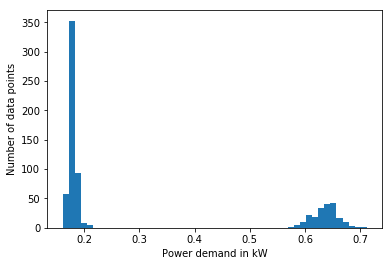

In [37]:
# The following histogram is Plotted to understand the notion of how spread the prices (distribution) are for the power demand.
pl.hist(target_variable,bins=50)
pl.xlabel('Power demand in kW')
pl.ylabel('Number of data points')

### 3.Cross Validation

In [38]:
from sklearn import cross_validation
def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
        
    # Shuffle and split the data
    X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=0.3,random_state=0)
  
    # Return the training and testing data subsets
    return X_train, y_train, X_test,y_test

# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(input_variables, target_variable)
    print ("Successfully shuffled and split the data!")
except:
    print ("Something went wrong with shuffling and splitting the data.")

Successfully shuffled and split the data!


In [39]:
#Checking out the shape of the matrices for training and testing data set
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(501, 2)
(216, 2)
(501,)
(216,)


### 4.Performance Metric

In [40]:
from sklearn.metrics import mean_squared_error
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    
    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print ("Successfully performed a metric calculation!")
except:
    print ("Something went wrong with performing a metric calculation.")

Successfully performed a metric calculation!


In [41]:
#Testing the error
total_error

0.0

#### 4.1 Optimization of the parameters using Grid search

In [42]:
from sklearn.metrics import make_scorer
from sklearn import grid_search
def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Scoring function
    scoring_function = make_scorer(mean_squared_error,greater_is_better=False)

    # GridSearchCV object
    reg = grid_search.GridSearchCV(regressor, parameters,scoring=scoring_function)

    # Fitting the learner to the data for obtaining the optimal model with tuned parameters
    reg.fit(X, y)

    # Returning the optimal model
    return reg


# Test fit_model on entire dataset
try:
    reg = fit_model(input_variables, target_variable)
    print ("Successfully fit a model!")
except:
    print ("Something went wrong with fitting a model.")

Successfully fit a model!


In [43]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print ("Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .")
    
    # Figure window
    fig = pl.figure(figsize=(10,8))

    # Varying the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Creating four different models based on max_depth
    for k, depth in enumerate([1,2,4,10]):
        
        for i, s in enumerate(sizes):
            
            # Setting-up a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fitting the learner to the training data
            regressor.fit(X_train[:s],y_train[:s])

            # Finding the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Finding the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

learning_curves(X_train, y_train, X_test, y_test)

### 6. Model complexity

In [44]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print ("Creating a model complexity graph. . . ")

    # Varying the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setting-up a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fitting the learner to the training data
        regressor.fit(X_train, y_train)

        # Finding the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Finding the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plotting the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

Creating a model complexity graph. . . 


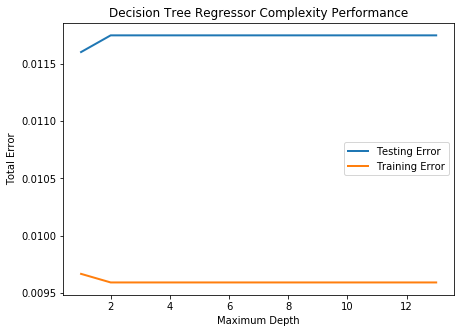

In [45]:
model_complexity(X_train, y_train, X_test, y_test)

####  6.1 Optimal parameters

In [46]:
print ("Final model optimal parameters:", reg.best_params_)

Final model optimal parameters: {'max_depth': 1}


### 7.Prediction of a power demand for a new set of input variables

In [47]:
new_inputs = [[1, 0]] #Gfan status , Y1 Status

In [48]:
sale_price = reg.predict(new_inputs)
print ("Predicted value of power demand: {0:.3f}".format(sale_price[0]))

Predicted value of power demand: 0.581
